In [1]:
import pandas as pd 
import numpy as np
import joblib

## Data preprocessing and Preparation

In [2]:
df_news = pd.read_csv('Data/news.csv')
df_news.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4064\2579890106.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_news = pd.read_csv('Data/news.csv')


,id,title,description,sourceId,sourceDomain,sourceUrl,newsDatetime,url,negative,positive,important,liked,disliked,lol,toxic,saved,comments,currencies
0,873,ApeCoin Community Votes to Stay on Ethereum,NaN,2,u.today,NaN,2022-06-09 06:57:15,https://cryptopanic.com/news/15444990/ApeCoin-...,0,0,0,0,0,0,0,0,0,"ETH,APE"
1,875,Terraform Labs Co-Founder Denies Accusations o...,NaN,2,u.today,NaN,2022-06-09 06:03:33,https://cryptopanic.com/news/15443520/Terrafor...,0,0,0,1,0,0,0,0,0,NaN
2,876,Anchor dev claims he warned Do Kwon over unsus...,NaN,7,cointelegraph.com,NaN,2022-06-09 05:39:22,https://cryptopanic.com/news/15442676/Anchor-d...,1,0,1,0,0,0,0,0,0,LUNC
3,877,"With 12 Key Measures of Prices, Truflation’s R...",NaN,11,newsbtc.com,NaN,2022-06-09 05:32:52,https://cryptopanic.com/news/15442724/With-12-...,0,0,0,0,0,0,0,0,0,XCN
4,878,'Father' of the Metaverse Neal Stephenson laun...,NaN,7,cointelegraph.com,NaN,2022-06-09 05:28:31,https://cryptopanic.com/news/15442350/Father-o...,0,1,0,2,0,0,0,0,0,NaN


### Data Cleaning

In [3]:
# Drop unnecessary columns
columns_to_drop = ['id', 'sourceId', 'sourceDomain', 'sourceUrl', 'url']
if columns_to_drop[0] in df_news.columns:
    df_news = df_news.drop(columns=columns_to_drop)

# Parse 'newsDate' to datetime
df_news['newsDatetime'] = pd.to_datetime(df_news['newsDatetime'], errors='coerce')

# For the assignment, keep only news from 2023-01-01 till 2024-12-31
df_news = df_news[(df_news['newsDatetime'] >= '2023-01-01') & (df_news['newsDatetime'] <= '2024-12-31')]


print(f"News datetime range: {df_news['newsDatetime'].min()} to {df_news['newsDatetime'].max()}\n")
# sort by newsDatetime
df_news = df_news.sort_values(by='newsDatetime').reset_index(drop=True)

# Keep rows where currencies include 'BTC'
df_news = df_news[df_news['currencies'].str.contains('BTC', na=False)]

print(f"Data Shape after Cleaning: {df_news.shape}\n")

print("Data Types after Cleaning:")
print(df_news.dtypes)
df_news.head()

News datetime range: 2023-01-01 00:09:28 to 2024-12-30 23:43:36

Data Shape after Cleaning: (17333, 13)

Data Types after Cleaning:
title                   object
description             object
newsDatetime    datetime64[ns]
negative                 int64
positive                 int64
important                int64
liked                    int64
disliked                 int64
lol                      int64
toxic                    int64
saved                    int64
comments                 int64
currencies              object
dtype: object


,title,description,newsDatetime,negative,positive,important,liked,disliked,lol,toxic,saved,comments,currencies
2,What a year this 2022 has been! The first #Roo...,NaN,2023-01-01 00:30:46,0,0,0,0,0,0,0,0,0,RBTC
35,"Quant (QNT), Decentraland (MANA) and One Ether...",NaN,2023-01-01 12:45:48,0,1,0,2,0,0,0,0,0,"BTC,ETH,QNT"
44,Bitcoin Bullish This Year? Popular Crypto Stra...,A popular crypto analyst is weighing in on the...,2023-01-01 15:30:55,0,4,3,4,0,0,0,0,0,BTC
47,Happy new year \n\nWe wish everyone a happy an...,NaN,2023-01-01 16:17:14,0,0,0,0,0,0,0,0,0,"LON,imBTC"
51,These 4 altcoins may attract buyers with Bitco...,Bitcoin remains stuck in a tight range but LTC...,2023-01-01 17:10:36,0,4,2,2,0,0,0,0,0,"BTC,LTC,APE,ICP,BIT"


In [4]:
df_news[['negative', 'positive', 'important', 'liked', 'disliked', 'lol', 'toxic', 'saved', 'comments']].describe()

# Number of rows with numeric columns = 0
numeric_columns = ['negative', 'positive', 'important', 'liked', 'disliked', 'lol', 'toxic', 'saved', 'comments']
for col in numeric_columns: 
    num_zero = (df_news[col] == 0).sum()
    print(f"Number of rows with {col} = 0: {num_zero}")
    print(f"Percentage of rows with {col} = 0: {num_zero / len(df_news) * 100:.2f}%\n")
    

Number of rows with negative = 0: 15865
Percentage of rows with negative = 0: 91.53%

Number of rows with positive = 0: 14243
Percentage of rows with positive = 0: 82.17%

Number of rows with important = 0: 14805
Percentage of rows with important = 0: 85.42%

Number of rows with liked = 0: 14247
Percentage of rows with liked = 0: 82.20%

Number of rows with disliked = 0: 16025
Percentage of rows with disliked = 0: 92.45%

Number of rows with lol = 0: 15281
Percentage of rows with lol = 0: 88.16%

Number of rows with toxic = 0: 17319
Percentage of rows with toxic = 0: 99.92%

Number of rows with saved = 0: 15312
Percentage of rows with saved = 0: 88.34%

Number of rows with comments = 0: 15787
Percentage of rows with comments = 0: 91.08%



In [5]:
# Merge columns to handle sparsity
if numeric_columns[0] in df_news.columns:
    df_news['Reaction_Positive'] = df_news['positive'] + df_news['liked'] + df_news['important'] + df_news['saved'] 
    df_news['Reaction_Negative'] = df_news['negative'] + df_news['disliked'] + df_news['toxic'] + df_news['lol']
    df_news['Total_Reactions'] = df_news['Reaction_Positive'] + df_news['Reaction_Negative'] + df_news['comments'] 

# Check number of rows with Reaction_Positive, Reaction_Negative, Total_Reactions = 0
print("After Merging Reactions:\n")
for col in ['Reaction_Positive', 'Reaction_Negative', 'Total_Reactions']:
    num_zero = (df_news[col] == 0).sum()
    print(f"Number of rows with {col} = 0: {num_zero}")
    print(f"Percentage of rows with {col} = 0: {num_zero / len(df_news) * 100:.2f}%\n")

if numeric_columns[0] in df_news.columns:
    df_news = df_news.drop(columns=numeric_columns)
    
df_news.head()

After Merging Reactions:

Number of rows with Reaction_Positive = 0: 13328
Percentage of rows with Reaction_Positive = 0: 76.89%

Number of rows with Reaction_Negative = 0: 14896
Percentage of rows with Reaction_Negative = 0: 85.94%

Number of rows with Total_Reactions = 0: 12571
Percentage of rows with Total_Reactions = 0: 72.53%



,title,description,newsDatetime,currencies,Reaction_Positive,Reaction_Negative,Total_Reactions
2,What a year this 2022 has been! The first #Roo...,NaN,2023-01-01 00:30:46,RBTC,0,0,0
35,"Quant (QNT), Decentraland (MANA) and One Ether...",NaN,2023-01-01 12:45:48,"BTC,ETH,QNT",3,0,3
44,Bitcoin Bullish This Year? Popular Crypto Stra...,A popular crypto analyst is weighing in on the...,2023-01-01 15:30:55,BTC,11,0,11
47,Happy new year \n\nWe wish everyone a happy an...,NaN,2023-01-01 16:17:14,"LON,imBTC",0,0,0
51,These 4 altcoins may attract buyers with Bitco...,Bitcoin remains stuck in a tight range but LTC...,2023-01-01 17:10:36,"BTC,LTC,APE,ICP,BIT",8,0,8


In [6]:
# text data cleaning
import re 
import html 

def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    # HTML Decoding
    text = html.unescape(text)
    
    # Remove URLs 
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) 
    
    # Remove User Handles and Hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove Non-ASCII Characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # Remove Retweet Indicators
    text = re.sub(r'\bRT\b', '', text)
    
    # Collapse Multiple Spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

df_news['cleaned_title'] = df_news['title'].apply(clean_text)

# fill nans in 'description' with title
df_news['cleaned_description'] = df_news['description'].apply(clean_text)


df_news[['title', 'cleaned_title']].head()

,title,cleaned_title
2,What a year this 2022 has been! The first #Roo...,What a year this 2022 has been! The first ever...
35,"Quant (QNT), Decentraland (MANA) and One Ether...","Quant (QNT), Decentraland (MANA) and One Ether..."
44,Bitcoin Bullish This Year? Popular Crypto Stra...,Bitcoin Bullish This Year? Popular Crypto Stra...
47,Happy new year \n\nWe wish everyone a happy an...,Happy new year We wish everyone a happy and bu...
51,These 4 altcoins may attract buyers with Bitco...,These 4 altcoins may attract buyers with Bitco...


### Feature Engineering

In [9]:
import pandas as pd
import numpy as np

def engineer_sentiment_volume_improved(df, window_hours=24):
    df_featured = df.copy()
    
    # Setup Index
    if 'newsDatetime' in df_featured.columns:
        df_featured = df_featured.set_index('newsDatetime').sort_index()

    
    df_featured['Raw_Pos'] = df_featured['Reaction_Positive'] # Simplified for Z-score
    df_featured['Raw_Neg'] = df_featured['Reaction_Negative']
    df_featured['Raw_Vol'] = df_featured['Total_Reactions']
    
    # Component-Wise Rolling Stats
    rolling_window = f'{window_hours}h'
    
    # --- POSITIVE COMPONENT ---
    pos_mean = df_featured['Raw_Pos'].rolling(rolling_window).mean()
    pos_std = df_featured['Raw_Pos'].rolling(rolling_window).std().replace(0, 1) # Avoid div/0
    # How unusual is the happiness?
    df_featured['Z_Pos'] = (df_featured['Raw_Pos'] - pos_mean) / pos_std
    
    # --- NEGATIVE COMPONENT (The "Rarity" Fix) ---
    neg_mean = df_featured['Raw_Neg'].rolling(rolling_window).mean()
    neg_std = df_featured['Raw_Neg'].rolling(rolling_window).std().replace(0, 1)
    # How unusual is the anger? (Small spikes = Huge Z-Score)
    df_featured['Z_Neg'] = (df_featured['Raw_Neg'] - neg_mean) / neg_std
    
    # Net Z-Score
    df_featured['Sentiment_Z_Score'] = df_featured['Z_Pos'] - df_featured['Z_Neg']
    
    # Volume Z-Score (Hype)
    vol_mean = df_featured['Raw_Vol'].rolling(rolling_window).mean()
    vol_std = df_featured['Raw_Vol'].rolling(rolling_window).std().replace(0, 1)
    df_featured['Volume_Z_Score'] = (df_featured['Raw_Vol'] - vol_mean) / vol_std
    
    # HARD NEUTRAL 
    df_featured.loc[df_featured['Raw_Vol'] == 0, 'Sentiment_Z_Score'] = 0

    
    # Fill NaNs 
    df_featured.fillna(0, inplace=True)

    # 7. Cleanup
    cols_keep = ['title', 'description', 'Reaction_Positive', 'Reaction_Negative', 'Total_Reactions', 'Sentiment_Z_Score', 'Volume_Z_Score']
    # If columns don't exist in input (e.g. title), skip them
    cols_final = [c for c in cols_keep if c in df_featured.columns]
    
    return df_featured[cols_final].reset_index()

# Run it
df_features = engineer_sentiment_volume_improved(df_news)
df_features.head()

,newsDatetime,title,description,Reaction_Positive,Reaction_Negative,Total_Reactions,Sentiment_Z_Score,Volume_Z_Score
0,2023-01-01 00:30:46,What a year this 2022 has been! The first #Roo...,0,0,0,0,0.000000,0.000000
1,2023-01-01 12:45:48,"Quant (QNT), Decentraland (MANA) and One Ether...",0,3,0,3,0.707107,0.707107
2,2023-01-01 15:30:55,Bitcoin Bullish This Year? Popular Crypto Stra...,A popular crypto analyst is weighing in on the...,11,0,11,1.113800,1.113800
3,2023-01-01 16:17:14,Happy new year \n\nWe wish everyone a happy an...,0,0,0,0,0.000000,-0.673575
4,2023-01-01 17:10:36,These 4 altcoins may attract buyers with Bitco...,Bitcoin remains stuck in a tight range but LTC...,8,0,8,0.730297,0.730297


In [10]:
# Classification of Sentiment
df_features['Sentiment_label'] = pd.cut(df_features['Sentiment_Z_Score'], bins=[-np.inf, -0.5, 0.5, np.inf], labels=['Negative', 'Neutral', 'Positive'])

# Check Distribution
print(df_features['Sentiment_label'].value_counts())

df_features.head()

Sentiment_label
Neutral     14514
Positive     1577
Negative     1242
Name: count, dtype: int64


,newsDatetime,title,description,Reaction_Positive,Reaction_Negative,Total_Reactions,Sentiment_Z_Score,Volume_Z_Score,Sentiment_label
0,2023-01-01 00:30:46,What a year this 2022 has been! The first #Roo...,0,0,0,0,0.000000,0.000000,Neutral
1,2023-01-01 12:45:48,"Quant (QNT), Decentraland (MANA) and One Ether...",0,3,0,3,0.707107,0.707107,Positive
2,2023-01-01 15:30:55,Bitcoin Bullish This Year? Popular Crypto Stra...,A popular crypto analyst is weighing in on the...,11,0,11,1.113800,1.113800,Positive
3,2023-01-01 16:17:14,Happy new year \n\nWe wish everyone a happy an...,0,0,0,0,0.000000,-0.673575,Neutral
4,2023-01-01 17:10:36,These 4 altcoins may attract buyers with Bitco...,Bitcoin remains stuck in a tight range but LTC...,8,0,8,0.730297,0.730297,Positive


In [11]:
# Classification of Volume Hype
df_features['Volume_label'] = pd.cut(df_features['Volume_Z_Score'], bins=[-np.inf, -0.5, 2, np.inf], labels=['Low', 'Medium', 'High'])

# Check Distribution
print(df_features['Volume_label'].value_counts())

df_features.head()

Volume_label
Medium    14514
Low        1866
High        953
Name: count, dtype: int64


,newsDatetime,title,description,Reaction_Positive,Reaction_Negative,Total_Reactions,Sentiment_Z_Score,Volume_Z_Score,Sentiment_label,Volume_label
0,2023-01-01 00:30:46,What a year this 2022 has been! The first #Roo...,0,0,0,0,0.000000,0.000000,Neutral,Medium
1,2023-01-01 12:45:48,"Quant (QNT), Decentraland (MANA) and One Ether...",0,3,0,3,0.707107,0.707107,Positive,Medium
2,2023-01-01 15:30:55,Bitcoin Bullish This Year? Popular Crypto Stra...,A popular crypto analyst is weighing in on the...,11,0,11,1.113800,1.113800,Positive,Medium
3,2023-01-01 16:17:14,Happy new year \n\nWe wish everyone a happy an...,0,0,0,0,0.000000,-0.673575,Neutral,Low
4,2023-01-01 17:10:36,These 4 altcoins may attract buyers with Bitco...,Bitcoin remains stuck in a tight range but LTC...,8,0,8,0.730297,0.730297,Positive,Medium


### Topic Clustering

In [14]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 
import seaborn as sns



def topics_clustering(df, sample_size=50000):
    """ 
    1. Embeds Titles (SBERT)
    2. Runs Grid Search to find best PCA Dims and K-Means Clusters using Silhouette Score
    3. Clusters data using Best Params
    4. Auto-labels topics using TF-IDF
    """
    
    data = df.copy()
    
    # 1. Embedding Titles
    print("Embedding Titles using SBERT...")
    model = SentenceTransformer('all-MiniLM-L6-v2')
    titles = data['title'].dropna().tolist()
    # choose unique titles only to reduce computation
    titles = list(set(titles))
    embeddings = model.encode(titles, show_progress_bar=True)
    
    # 2. Grid Search for Best PCA Dims and K-Means Clusters
    print("Running Grid Search for Best PCA Dims and K-Means Clusters...")
    pca_options = [3, 4, 5, 10, 15]
    k_options = range(4, 13) 
    
    best_score = -1
    best_params = (None, None)
    results = []
    
    if len(embeddings) > sample_size:
        sample_indices = np.random.choice(len(embeddings), size=sample_size, replace=False)
        embeddings_sample = embeddings[sample_indices]
    else:
        embeddings_sample = embeddings
    
    print(f"Using sample size: {len(embeddings_sample)} for grid search.")
    
    for n_components in pca_options: 
        # Apply PCA 
        pca = PCA(n_components=n_components, random_state=42)
        reduced_sample = pca.fit_transform(embeddings_sample)
        
        for k in k_options:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) 
            labels = kmeans.fit_predict(reduced_sample)
            
            # Evaluate using Silhouette Score
            score = silhouette_score(reduced_sample, labels)
            results.append((n_components, k, score))
            
            if score > best_score:
                best_score = score
                best_params = (n_components, k)
            
            print(f"PCA Dims: {n_components}, Number of Clusters: {k} => Silhouette Score: {score:.4f}")
            
    print(f"Best Params - PCA Dims: {best_params[0]}, K: {best_params[1]} with Silhouette Score: {best_score:.4f}")
    
    # 3. Cluster Data using Best Params
    print("Clustering Data using Best Params...")
    n_components_best, k_best = best_params
    pca_final = PCA(n_components=n_components_best, random_state=42)
    reduced_embeddings = pca_final.fit_transform(embeddings)
    
    # Cluster with K-Means
    kmeans_final = KMeans(n_clusters=k_best, random_state=42, n_init=10)
    cluster_labels = kmeans_final.fit_predict(reduced_embeddings)
    
    # Map titles to Cluster Labels
    title_to_cluster = dict(zip(titles, cluster_labels))
    data['Topic_ID'] = data['title'].map(title_to_cluster)
    
    # 4. Auto-label Topics using TF-IDF
    print("Auto-labeling Topics using TF-IDF...")
    
    # Combine titles per cluster
    cluster_docs = data.groupby('Topic_ID')['title'].apply(lambda x: " ".join(x.astype(str))).reset_index()
    
    # Extract unique words per cluster
    crypto_stopwords = [
        'bitcoin', 'btc', 'crypto', 'cryptocurrency', 'market', 'price', 
        'news', 'daily', 'update', 'analysis', 'prediction', 'today', 
        'live', 'watch', 'video', 'says', 'new', 'top', 'best', 'year',
        'ethereum', 'eth', 'altcoin', 'altcoins'
    ]
    
    my_stop_words = list(ENGLISH_STOP_WORDS.union(crypto_stopwords))
    tfidf = TfidfVectorizer(stop_words=my_stop_words, max_features=1000)
    tfidf_matrix = tfidf.fit_transform(cluster_docs['title'])
    feature_names = tfidf.get_feature_names_out()
    
    topic_map = {}
    print("Top words per Topic:")
    for i in range(len(cluster_docs)):
        row = tfidf_matrix[i]
        top_indices = row.toarray().flatten().argsort()[-10:][::-1]
        keywords = [feature_names[idx] for idx in top_indices]
        
        # Create Label 
        topic_name = f"Topic_{'_'.join(keywords)}"
        cluster_id = cluster_docs.loc[i, 'Topic_ID']
        topic_map[cluster_id] = topic_name
        
        print(f"Cluster {cluster_id}: {topic_name}")

    data['Topic_Label'] = data['Topic_ID'].map(topic_map)
    
    return data     

    
    

In [15]:
import warnings 
warnings.filterwarnings('ignore')

df_clustering = topics_clustering(df_features)
df_clustering.head()

Embedding Titles using SBERT...


Batches:   0%|          | 0/542 [00:00<?, ?it/s]

Running Grid Search for Best PCA Dims and K-Means Clusters...
Using sample size: 17333 for grid search.
PCA Dims: 3, Number of Clusters: 4 => Silhouette Score: 0.2841
PCA Dims: 3, Number of Clusters: 5 => Silhouette Score: 0.2883
PCA Dims: 3, Number of Clusters: 6 => Silhouette Score: 0.2811
PCA Dims: 3, Number of Clusters: 7 => Silhouette Score: 0.2607
PCA Dims: 3, Number of Clusters: 8 => Silhouette Score: 0.2608
PCA Dims: 3, Number of Clusters: 9 => Silhouette Score: 0.2520
PCA Dims: 3, Number of Clusters: 10 => Silhouette Score: 0.2484
PCA Dims: 3, Number of Clusters: 11 => Silhouette Score: 0.2475
PCA Dims: 3, Number of Clusters: 12 => Silhouette Score: 0.2492
PCA Dims: 4, Number of Clusters: 4 => Silhouette Score: 0.2281
PCA Dims: 4, Number of Clusters: 5 => Silhouette Score: 0.2532
PCA Dims: 4, Number of Clusters: 6 => Silhouette Score: 0.2581
PCA Dims: 4, Number of Clusters: 7 => Silhouette Score: 0.2453
PCA Dims: 4, Number of Clusters: 8 => Silhouette Score: 0.2351
PCA Dims: 4

,newsDatetime,title,description,Reaction_Positive,Reaction_Negative,Total_Reactions,Sentiment_Z_Score,Volume_Z_Score,Sentiment_label,Volume_label,Topic_ID,Topic_Label
0,2023-01-01 00:30:46,What a year this 2022 has been! The first #Roo...,0,0,0,0,0.000000,0.000000,Neutral,Medium,1,Topic_etf_rt_solana_huobi_sec_spot_chain_binan...
1,2023-01-01 12:45:48,"Quant (QNT), Decentraland (MANA) and One Ether...",0,3,0,3,0.707107,0.707107,Positive,Medium,2,Topic_buy_xrp_week_2024_solana_analyst_sol_pri...
2,2023-01-01 15:30:55,Bitcoin Bullish This Year? Popular Crypto Stra...,A popular crypto analyst is weighing in on the...,11,0,11,1.113800,1.113800,Positive,Medium,2,Topic_buy_xrp_week_2024_solana_analyst_sol_pri...
3,2023-01-01 16:17:14,Happy new year \n\nWe wish everyone a happy an...,0,0,0,0,0.000000,-0.673575,Neutral,Low,2,Topic_buy_xrp_week_2024_solana_analyst_sol_pri...
4,2023-01-01 17:10:36,These 4 altcoins may attract buyers with Bitco...,Bitcoin remains stuck in a tight range but LTC...,8,0,8,0.730297,0.730297,Positive,Medium,2,Topic_buy_xrp_week_2024_solana_analyst_sol_pri...


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

def inspect_topic_keywords(df, n_top_words=50):
    """
    Prints the top N keywords for each Topic_ID to help with manual naming.
    """
    data = df.copy()
    
    data['title'] = data['title'].astype(str).str.lower()
    # 1. Group all titles by Topic ID
    cluster_docs = data.groupby('Topic_ID')['title'].apply(lambda x: " ".join(x.astype(str))).reset_index()
    
    # 2. Define Stop Words 
    crypto_stopwords = [
        'bitcoin', 'btc', 'crypto', 'cryptocurrency', 'market', 'price', 
        'news', 'daily', 'update', 'analysis', 'prediction', 'today', 
        'live', 'watch', 'video', 'says', 'new', 'top', 'best', 'year',
        'ethereum', 'eth', 'altcoin', 'altcoins'
    ]
    my_stop_words = list(ENGLISH_STOP_WORDS.union(crypto_stopwords))
    
    # 3. Run TF-IDF
    # We use a larger max_features to capture more variety
    tfidf = TfidfVectorizer(stop_words=my_stop_words, max_features=2000)
    tfidf_matrix = tfidf.fit_transform(cluster_docs['title'])
    feature_names = tfidf.get_feature_names_out()
    
    print(f"--- Top {n_top_words} Keywords per Topic ---\n")
    
    for i in range(len(cluster_docs)):
        cluster_id = cluster_docs.iloc[i]['Topic_ID']
        
        # Get the row for this cluster
        row = tfidf_matrix[i]
        
        # Sort indices by score (descending)
        # We take the top N indices
        top_indices = row.toarray().flatten().argsort()[-n_top_words:][::-1]
        
        # Map to words
        keywords = [feature_names[idx] for idx in top_indices]
        
        print(f" Topic {cluster_id}:")
        print(", ".join(keywords[:50]))
        print("-" * 80)

    # Save keywords of each topic to a dictionary
    topic_keywords = {}
    for i in range(len(cluster_docs)):
        cluster_id = cluster_docs.iloc[i]['Topic_ID']
        row = tfidf_matrix[i]
        top_indices = row.toarray().flatten().argsort()[-n_top_words:][::-1]
        keywords = [feature_names[idx] for idx in top_indices]
        # Convert numpy int32 to python int for json serialization
        topic_keywords[int(cluster_id)] = keywords
    # Save to json file
    import json
    with open('Models/topic_keywords.json', 'w') as f:
        json.dump(topic_keywords, f, indent=4)


inspect_topic_keywords(df_clustering, n_top_words=1000)

--- Top 1000 Keywords per Topic ---

 Topic 0:
000, analyst, rally, surge, million, etf, high, hits, etfs, cash, amid, dogecoin, billion, bullish, time, predicts, trader, bull, halving, week, data, prices, 100, hit, spot, record, gains, inflows, 2024, falls, 60k, key, surges, bulls, rise, 10, sell, following, ahead, bch, traders, whales, drop, 24, hours, crash, fed, low, run, blackrock
--------------------------------------------------------------------------------
 Topic 1:
etf, rt, solana, huobi, sec, spot, chain, binance, wbtc, trading, launches, token, launch, million, web3, network, etfs, defi, coinbase, wormholecrypto, protocol, cross, tokens, cardano, wallet, morpho, 000, community, primevote, usdt, approval, xrp, join, exchange, wormhole, amid, sun, justin, ecosystem, blockchain, support, users, ai, stacks, nft, trade, announces, earn, amp, 10
--------------------------------------------------------------------------------
 Topic 2:
buy, xrp, week, 2024, solana, analyst, sol, p

In [18]:
# reorder columns 
df_clustering = df_clustering[['newsDatetime', 'Topic_ID', 'Topic_Label', 'title', 'description', 'Reaction_Positive', 'Reaction_Negative', 'Total_Reactions', 'Sentiment_Z_Score', 'Volume_Z_Score', 'Sentiment_label', 'Volume_label']]

# Rename Topic_Label to more readable format
names_mapping = {
    0: "Topic_Exchange_DeFi",
    1: "Topic_Market_Stats",
    2: "Topic_Altcoins_Memes",
    3: "Topic_Macro_Politics",
    4: "Topic_Price_Prediction"
}

df_clustering['Topic_Label'] = df_clustering['Topic_ID'].map(names_mapping)

df_clustering.head()

,newsDatetime,Topic_ID,Topic_Label,title,description,Reaction_Positive,Reaction_Negative,Total_Reactions,Sentiment_Z_Score,Volume_Z_Score,Sentiment_label,Volume_label
0,2023-01-01 00:30:46,1,Topic_Market_Stats,What a year this 2022 has been! The first #Roo...,0,0,0,0,0.000000,0.000000,Neutral,Medium
1,2023-01-01 12:45:48,2,Topic_Altcoins_Memes,"Quant (QNT), Decentraland (MANA) and One Ether...",0,3,0,3,0.707107,0.707107,Positive,Medium
2,2023-01-01 15:30:55,2,Topic_Altcoins_Memes,Bitcoin Bullish This Year? Popular Crypto Stra...,A popular crypto analyst is weighing in on the...,11,0,11,1.113800,1.113800,Positive,Medium
3,2023-01-01 16:17:14,2,Topic_Altcoins_Memes,Happy new year \n\nWe wish everyone a happy an...,0,0,0,0,0.000000,-0.673575,Neutral,Low
4,2023-01-01 17:10:36,2,Topic_Altcoins_Memes,These 4 altcoins may attract buyers with Bitco...,Bitcoin remains stuck in a tight range but LTC...,8,0,8,0.730297,0.730297,Positive,Medium


In [19]:
df_clustering['Topic_Label'].value_counts()

Topic_Label
Topic_Exchange_DeFi       4219
Topic_Market_Stats        3464
Topic_Price_Prediction    3427
Topic_Macro_Politics      3369
Topic_Altcoins_Memes      2854
Name: count, dtype: int64

### Integration and Analysis

In [29]:
df_price = pd.read_csv("Data/bitcoin_data_train.csv")
df_price.head()

,open_time,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-01-01 00:00:00,16541.77,16544.76,16538.45,16543.67,83.08143,1.374269e+06,2687,40.18369,6.647060e+05
1,2023-01-01 00:01:00,16543.04,16544.41,16538.48,16539.31,80.45300,1.330773e+06,2890,33.28428,5.505633e+05
2,2023-01-01 00:02:00,16539.31,16541.17,16534.52,16536.43,62.90197,1.040248e+06,1930,20.73999,3.430094e+05
3,2023-01-01 00:03:00,16536.43,16537.28,16531.00,16533.65,115.71894,1.913268e+06,2956,49.40758,8.169194e+05
4,2023-01-01 00:04:00,16534.12,16536.08,16527.51,16535.38,144.45369,2.388081e+06,3795,76.52421,1.265080e+06


In [30]:
df_clustering.head()

,newsDatetime,Topic_ID,Topic_Label,title,description,Reaction_Positive,Reaction_Negative,Total_Reactions,Sentiment_Z_Score,Volume_Z_Score,Sentiment_label,Volume_label
0,2023-01-01 00:30:46,2,Topic_Altcoins_Memes,What a year this 2022 has been! The first #Roo...,0,0,0,0,0.000000,0.000000,Neutral,Medium
1,2023-01-01 12:45:48,4,Topic_Price_Prediction,"Quant (QNT), Decentraland (MANA) and One Ether...",0,3,0,3,0.707107,0.707107,Positive,Medium
2,2023-01-01 15:30:55,4,Topic_Price_Prediction,Bitcoin Bullish This Year? Popular Crypto Stra...,A popular crypto analyst is weighing in on the...,11,0,11,1.113800,1.113800,Positive,Medium
3,2023-01-01 16:17:14,4,Topic_Price_Prediction,Happy new year \n\nWe wish everyone a happy an...,0,0,0,0,0.000000,-0.673575,Neutral,Low
4,2023-01-01 17:10:36,4,Topic_Price_Prediction,These 4 altcoins may attract buyers with Bitco...,Bitcoin remains stuck in a tight range but LTC...,8,0,8,0.730297,0.730297,Positive,Medium


In [31]:
def integrate_data(df_price, df_clustering):
    news_df = df_clustering.copy()
    
    print("--- 1. PREPARING NEWS DATA ---")
    # ensure Datetime Index 
    news_df['newsDatetime'] = pd.to_datetime(news_df['newsDatetime'], errors='coerce')
    news_df = news_df.set_index('newsDatetime').sort_index()
    
    # Hourly aggregation
    hourly_news = news_df.resample('1h').agg({
        'Sentiment_Z_Score': 'mean',
        'Volume_Z_Score': 'mean',
        'Topic_Label': lambda x: x.mode()[0] if not x.mode().empty else "Topic_None",
    })
    
    hourly_news = hourly_news.shift(1)  # Shift by 1 hour to avoid look-ahead bias
    
    # Re-binning
    conditions_sent = [
        hourly_news['Sentiment_Z_Score'] > 0.5, 
        hourly_news['Sentiment_Z_Score'] < -0.5
    ]
    
    hourly_news['News_Sentiment'] = np.select(conditions_sent, ['Sent_Positive', 'Sent_Negative'], default='Sent_Neutral')
    
    condition_buzz = [
        hourly_news['Volume_Z_Score'] > 2,
        hourly_news['Volume_Z_Score'] < -0.5
    ]
    
    hourly_news['News_Buzz'] = np.select(condition_buzz, ['Buzz_High', 'Buzz_Low'], default='Buzz_Medium')
    
    hourly_news = hourly_news.rename(columns={'Topic_Label': 'News_Topic'})
    
    print("--- 2. PREPARING PRICE DATA ---")
    
    # keep only necessary columns
    cols_to_keep = ['open_time', 'open', 'high', 'low', 'close', 'volume']
    
    cols_final = [c for c in cols_to_keep if c in df_price.columns]
    price_df = df_price[cols_final].copy()
    
    # ensure Datetime Index
    price_df['open_time'] = pd.to_datetime(price_df['open_time'], errors='coerce')
    price_df = price_df.set_index('open_time').sort_index()
    
    print("--- 3. MERGING DATA ---")
    merged_df = pd.merge_asof(
        price_df,
        hourly_news[['News_Sentiment', 'News_Buzz', "News_Topic"]], 
        left_index=True,
        right_index=True,
        direction='backward',
        tolerance=pd.Timedelta('2h')
    )
    
    # Fill N/A values (No news = Neutral)
    merged_df['News_Sentiment'] = merged_df['News_Sentiment'].fillna('Sent_Neutral')
    merged_df['News_Buzz'] = merged_df['News_Buzz'].fillna('Buzz_Medium')
    merged_df['News_Topic'] = merged_df['News_Topic'].fillna('Topic_None')
    
    print(f"Merged Data Shape: {merged_df.shape}")
    
    return merged_df  

df_merged = integrate_data(df_price, df_clustering)
df_merged.head()

--- 1. PREPARING NEWS DATA ---
--- 2. PREPARING PRICE DATA ---
--- 3. MERGING DATA ---
Merged Data Shape: (1052560, 8)


,open,high,low,close,volume,News_Sentiment,News_Buzz,News_Topic
open_time,,,,,,,,
2023-01-01 00:00:00,16541.77,16544.76,16538.45,16543.67,83.08143,Sent_Neutral,Buzz_Medium,Topic_None
2023-01-01 00:01:00,16543.04,16544.41,16538.48,16539.31,80.45300,Sent_Neutral,Buzz_Medium,Topic_None
2023-01-01 00:02:00,16539.31,16541.17,16534.52,16536.43,62.90197,Sent_Neutral,Buzz_Medium,Topic_None
2023-01-01 00:03:00,16536.43,16537.28,16531.00,16533.65,115.71894,Sent_Neutral,Buzz_Medium,Topic_None
2023-01-01 00:04:00,16534.12,16536.08,16527.51,16535.38,144.45369,Sent_Neutral,Buzz_Medium,Topic_None


In [32]:
df_merged.to_csv("Data/merged_news_price_data.csv", index=False)

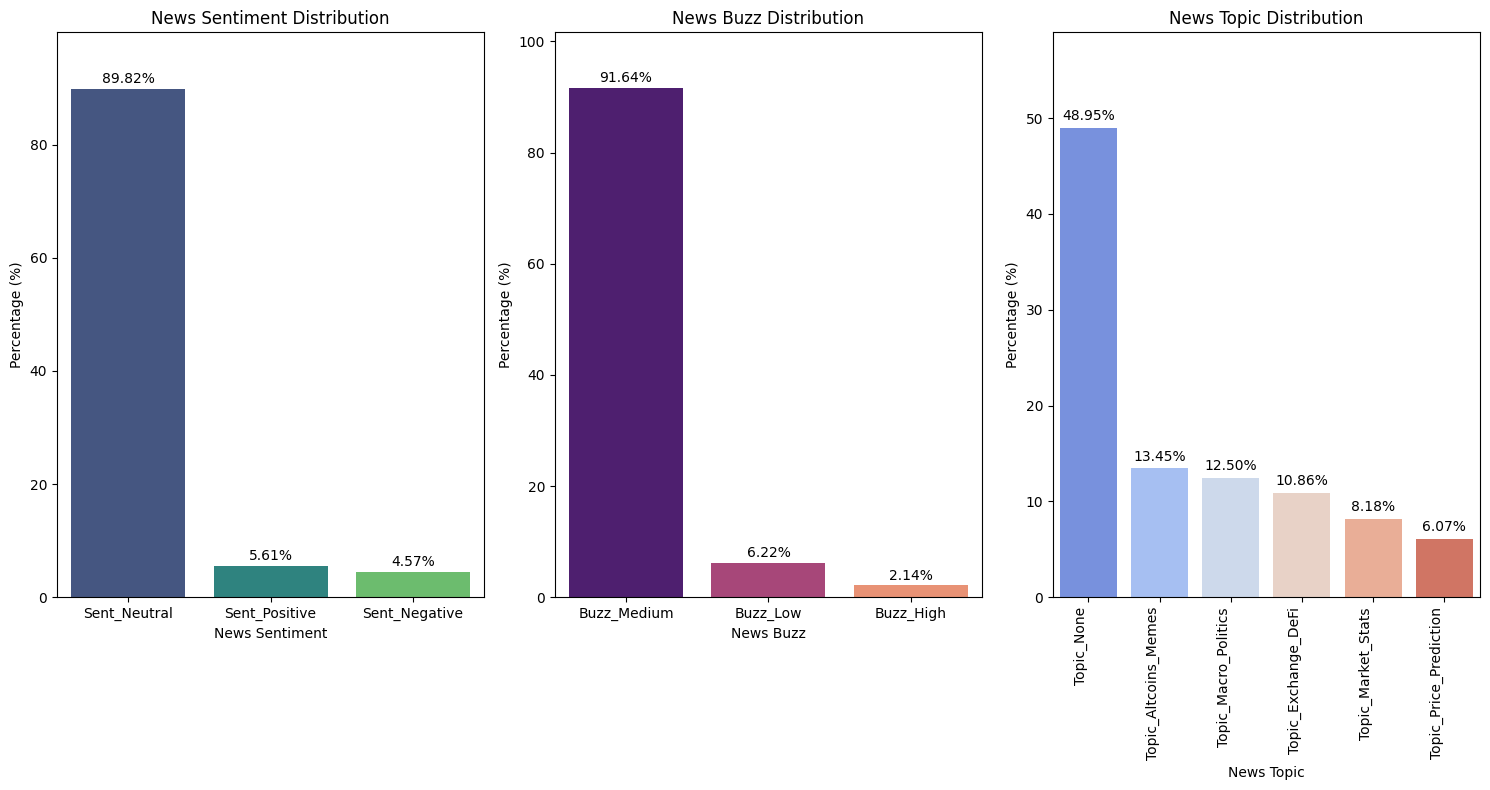

In [33]:
# Distribution of News Sentiment, Buzz, and Topics with percentages on top of each bar
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))

# Sentiment Distribution
plt.subplot(1, 3, 1)
sentiment_counts = df_merged['News_Sentiment'].value_counts(normalize=True) * 100
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('News Sentiment Distribution')
for i, v in enumerate(sentiment_counts.values):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', va='bottom')
plt.ylabel('Percentage (%)')
plt.xlabel('News Sentiment')
plt.ylim(0, sentiment_counts.max() + 10)
# Buzz Distribution
plt.subplot(1, 3, 2)
buzz_counts = df_merged['News_Buzz'].value_counts(normalize=True) * 100
sns.barplot(x=buzz_counts.index, y=buzz_counts.values, palette='magma')
plt.title('News Buzz Distribution')
for i, v in enumerate(buzz_counts.values):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', va='bottom')
plt.ylabel('Percentage (%)')
plt.xlabel('News Buzz')
plt.ylim(0, buzz_counts.max() + 10)
# Topic Distribution
plt.subplot(1, 3, 3)
topic_counts = df_merged['News_Topic'].value_counts(normalize=True) * 100
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='coolwarm')
plt.title('News Topic Distribution')
plt.xticks(rotation=90, ha='right')
for i, v in enumerate(topic_counts.values):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', va='bottom')
plt.ylabel('Percentage (%)')
plt.xlabel('News Topic')
plt.ylim(0, topic_counts.max() + 10)
plt.tight_layout()
plt.show()

## Association Pattern Mining

### Aggregate Data for Association Mining

In [34]:
bitcoin_transactions = pd.read_csv("Data/bitcoin_transactions.csv")
bitcoin_transactions.head()


,open_time,Phase_Label,RSI_Bin,Vol_Bin,Trend_Bin,Struct_Bin,target_label
0,2023-01-01 00:33:00,Phase_Markdown,RSI_Neutral,Vol_Normal,Trend_Neutral,Struct_Neutral,Dump
1,2023-01-01 00:34:00,Phase_Markdown,RSI_Bearish,Vol_Normal,Trend_Neutral,Struct_Neutral,Dump
2,2023-01-01 00:35:00,Phase_Markdown,RSI_Bearish,Vol_High,Trend_Neutral,Struct_Neutral,Sideways
3,2023-01-01 00:36:00,Phase_Markdown,RSI_Bearish,Vol_High,Trend_Neutral,Struct_Neutral,Pump
4,2023-01-01 00:37:00,Phase_Markdown,RSI_Oversold,Vol_High,Trend_Bearish,Struct_Neutral,Pump


In [35]:
# Ensure open_time in bitcoin_transactions is in datetime format
bitcoin_transactions['open_time'] = pd.to_datetime(bitcoin_transactions['open_time'], errors='coerce')

# Merge transactions and df_merged (columns: News_Sentiment, News_Buzz, News_Topic) on open_time (prioritize transactions)
merged_transactions = pd.merge_asof(
    bitcoin_transactions.sort_values('open_time'),
    df_merged[['News_Sentiment', 'News_Buzz', 'News_Topic']].sort_index(),
    left_on='open_time',
    right_index=True,
    direction='backward',
)

merged_transactions.head()

,open_time,Phase_Label,RSI_Bin,Vol_Bin,Trend_Bin,Struct_Bin,target_label,News_Sentiment,News_Buzz,News_Topic
0,2023-01-01 00:33:00,Phase_Markdown,RSI_Neutral,Vol_Normal,Trend_Neutral,Struct_Neutral,Dump,Sent_Neutral,Buzz_Medium,Topic_None
1,2023-01-01 00:34:00,Phase_Markdown,RSI_Bearish,Vol_Normal,Trend_Neutral,Struct_Neutral,Dump,Sent_Neutral,Buzz_Medium,Topic_None
2,2023-01-01 00:35:00,Phase_Markdown,RSI_Bearish,Vol_High,Trend_Neutral,Struct_Neutral,Sideways,Sent_Neutral,Buzz_Medium,Topic_None
3,2023-01-01 00:36:00,Phase_Markdown,RSI_Bearish,Vol_High,Trend_Neutral,Struct_Neutral,Pump,Sent_Neutral,Buzz_Medium,Topic_None
4,2023-01-01 00:37:00,Phase_Markdown,RSI_Oversold,Vol_High,Trend_Bearish,Struct_Neutral,Pump,Sent_Neutral,Buzz_Medium,Topic_None


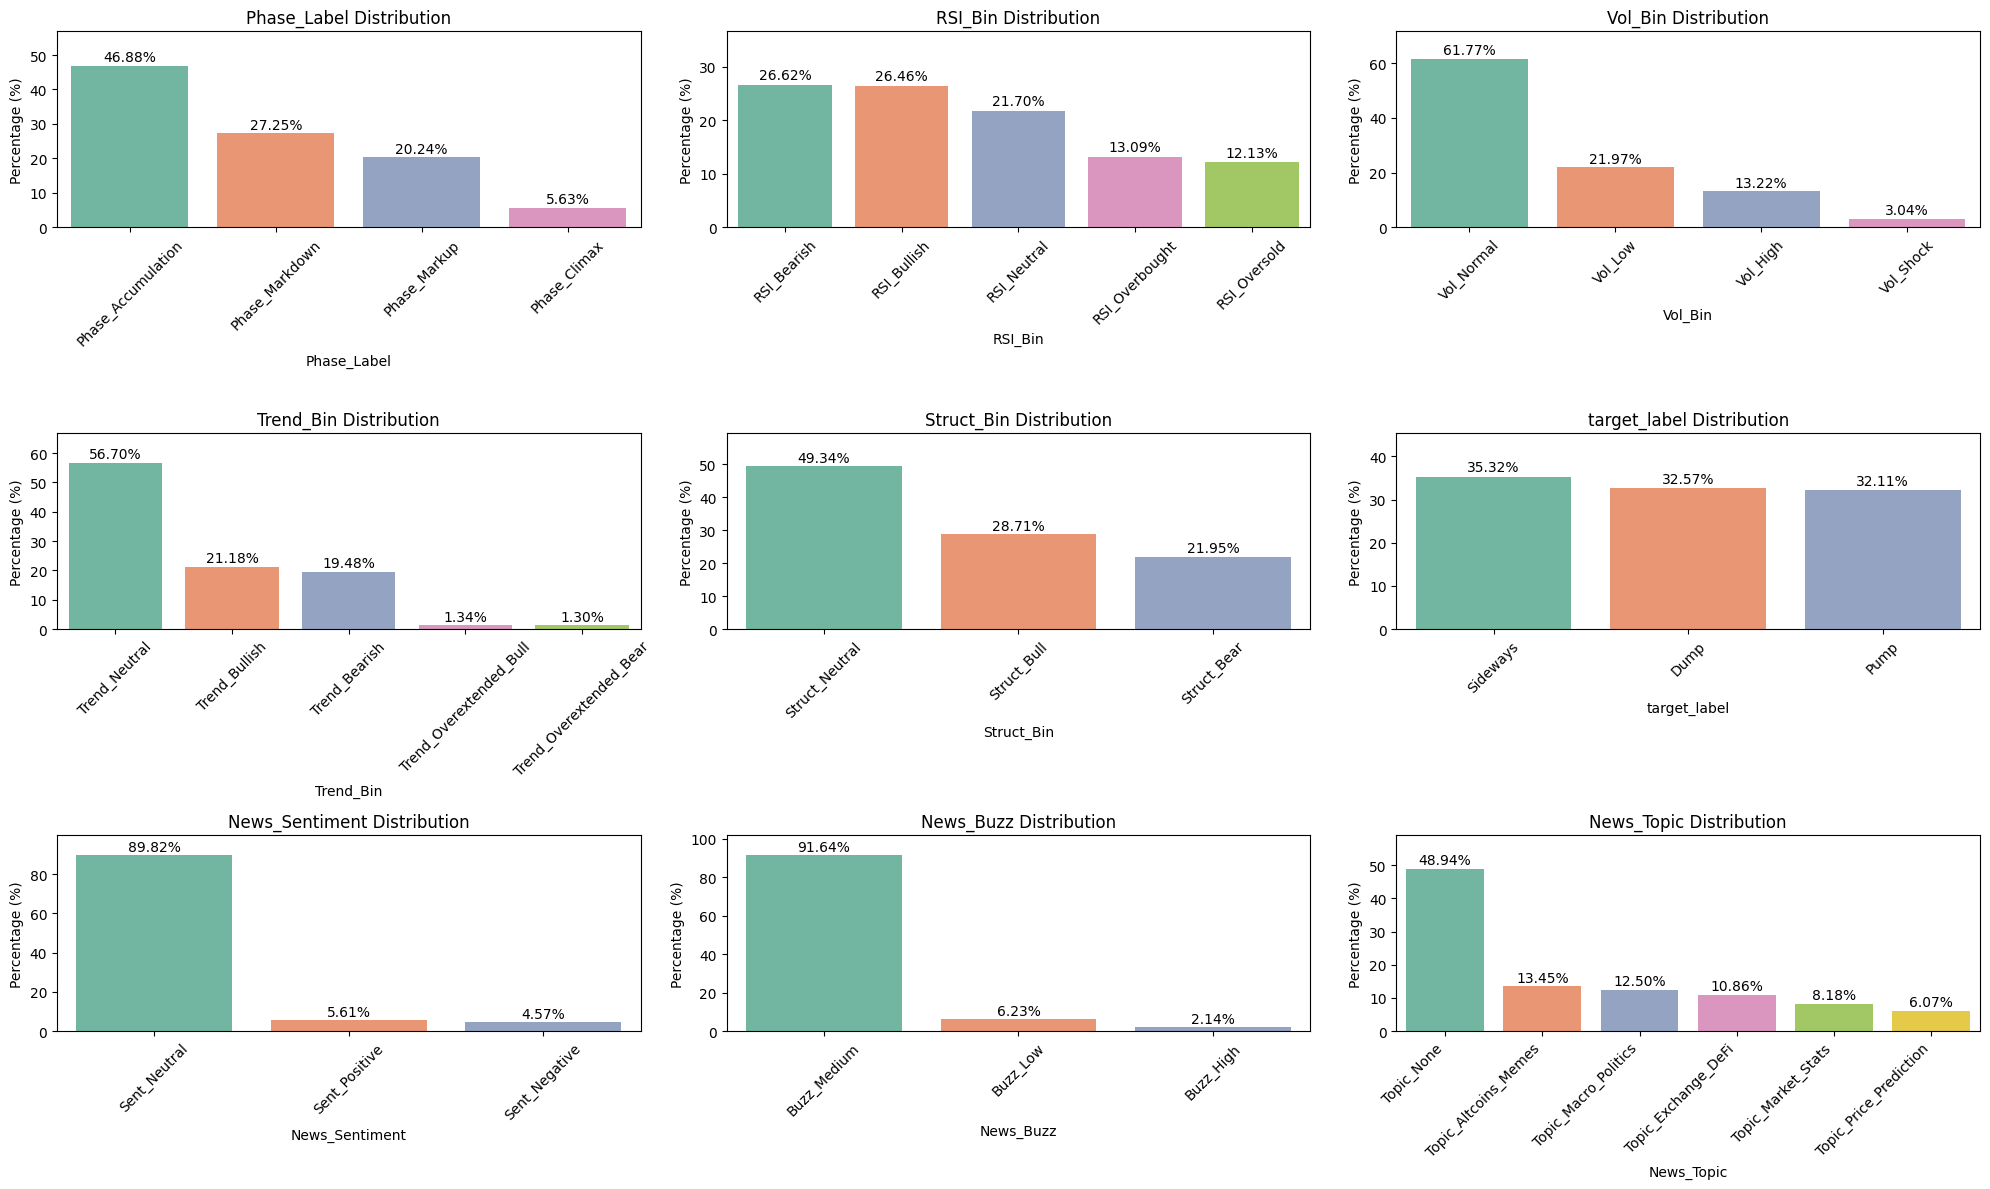

In [36]:
# Distribution Visualization of Phase_Label, RSI_Bin, Vol_Bin, Trend_Bin, Struct_Bin, target_label, News_Sentiment, News_Buzz, News_Topic

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
columns_to_plot = ['Phase_Label', 'RSI_Bin', 'Vol_Bin', 'Trend_Bin', 'Struct_Bin', 'target_label', 'News_Sentiment', 'News_Buzz', 'News_Topic']

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    counts = merged_transactions[col].value_counts(normalize=True) * 100
    sns.barplot(x=counts.index, y=counts.values, palette='Set2')
    plt.title(f'{col} Distribution')
    for j, v in enumerate(counts.values):
        plt.text(j, v + 0.5, f"{v:.2f}%", ha='center', va='bottom')
    plt.ylabel('Percentage (%)')
    plt.xlabel(col)
    plt.ylim(0, counts.max() + 10)
    if col == 'News_Topic':
        plt.xticks(rotation=90, ha='right')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import fpgrowth, association_rules
from tqdm import tqdm

def hybrid_mining(df_merged):
    # Drop open_time column if exists
    data = df_merged.copy()
    if 'open_time' in data.columns:
        data = data.drop(columns=['open_time'])
        
    # Convert all columns to string type
    data = data.astype(str)
    
    transactions = []
    # List of values to Ignore 
    ignore_items = ['Sent_Neutral', 'Buzz_Medium', "Topic_None", "nan", "None"]
    
    print("Preparing Transactions...")
    raw_transactions = data.values.tolist()
    
    transactions = [
        [item for item in row if item not in ignore_items] 
        for row in raw_transactions
    ]
    transactions = [t for t in transactions if len(t) > 0] # remove transactions that are empty after filtering

    print(f"Transactions ready: {len(transactions)}")
    
    # Encoding data
    print("Encoding Transactions...")
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
    
    # Frequent Pattern Mining using FP-Growth
    print("Running FP-Growth...")
    frequent_itemsets = fpgrowth(df_encoded, min_support=0.005,max_len=6, use_colnames=True)
    
    print(f"Number of Frequent Itemsets: {len(frequent_itemsets)}")
    
    # Generate Association Rules
    print("Generating Association Rules...")
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
    
    # format for better readability
    rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))
    
    # strategy extraction
    buy_mask = (
        (rules['consequents'] == 'Pump') & 
        (rules['lift'] > 1.1) & 
        (rules['confidence'] > 0.35) & 
        (rules['antecedents'].str.contains('Sent_|Buzz_|Topic_')) # Must include news features
    )
    
    hybrid_buy = rules[buy_mask].sort_values(by='lift', ascending=False)
    
    sell_mask = (
        (rules['consequents'] == 'Dump') & 
        (rules['lift'] > 1.1) & 
        (rules['confidence'] > 0.45) & 
        (rules['antecedents'].str.contains('Sent_|Buzz_|Topic_')) # Must include news features
    )
    
    hybrid_sell = rules[sell_mask].sort_values(by='lift', ascending=False)
    
    return frequent_itemsets, rules, hybrid_buy, hybrid_sell

    


In [38]:
frequent_itemsets, rules, hybrid_buy, hybrid_sell = hybrid_mining(merged_transactions)


Preparing Transactions...
Transactions ready: 1052457
Encoding Transactions...
Running FP-Growth...
Number of Frequent Itemsets: 3809
Generating Association Rules...


In [43]:
print("Frequent Itemsets Sample:")
print(frequent_itemsets.head())
print("\nAssociation Rules Sample:")
print(rules.head())
print("\nHybrid Buy Strategies:")
print(hybrid_buy)
print("\nHybrid Sell Strategies:")
print(hybrid_sell)

Frequent Itemsets Sample:
    support          itemsets
0  0.617735      (Vol_Normal)
1  0.567029   (Trend_Neutral)
2  0.493366  (Struct_Neutral)
3  0.325708            (Dump)
4  0.272507  (Phase_Markdown)

Association Rules Sample:
      antecedents     consequents  antecedent support  consequent support  \
0      Vol_Normal   Trend_Neutral            0.617735            0.567029   
1   Trend_Neutral      Vol_Normal            0.567029            0.617735   
2   Trend_Neutral  Struct_Neutral            0.567029            0.493366   
3  Struct_Neutral   Trend_Neutral            0.493366            0.567029   
4      Vol_Normal  Struct_Neutral            0.617735            0.493366   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.348678    0.564446  0.995444               1.0 -0.001596    0.994069   
1  0.348678    0.614921  0.995444               1.0 -0.001596    0.992692   
2  0.311784    0.549855  1.114498               1.0  0.032031    1.125491

In [39]:
# Save frequent rules to CSV files 
rules.to_csv("Data/association_rules_news.csv", index=False)
frequent_itemsets.to_csv("Data/frequent_itemsets_news.csv", index=False)

